In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

## Load Data

In [2]:
YieldCurve = pd.read_csv('USTREASURY-YIELD.csv', index_col = 0, parse_dates = True).sort_index()

In [3]:
YieldCurve.head()

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
2020-01-02,1.53,1.55,1.54,1.57,1.56,1.58,1.59,1.67,1.79,1.88,2.19,2.33
2020-01-03,1.52,1.55,1.52,1.55,1.55,1.53,1.54,1.59,1.71,1.80,2.11,2.26
2020-01-06,1.54,1.54,1.56,1.56,1.54,1.54,1.56,1.61,1.72,1.81,2.13,2.28
2020-01-07,1.52,1.53,1.54,1.56,1.53,1.54,1.55,1.62,1.74,1.83,2.16,2.31
2020-01-08,1.50,1.53,1.54,1.56,1.55,1.58,1.61,1.67,1.78,1.87,2.21,2.35


In [4]:
YieldCurve.tail()

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
2020-04-02,0.09,0.10,0.09,0.15,0.14,0.23,0.29,0.39,0.53,0.63,1.04,1.26
2020-04-03,0.09,0.11,0.10,0.15,0.15,0.23,0.30,0.39,0.52,0.62,1.05,1.24
2020-04-06,0.09,0.13,0.15,0.17,0.20,0.27,0.35,0.44,0.58,0.67,1.08,1.27
2020-04-07,0.10,0.13,0.14,0.20,0.20,0.28,0.36,0.48,0.64,0.75,1.13,1.32
2020-04-08,0.14,0.17,0.22,0.24,0.23,0.27,0.34,0.47,0.65,0.77,1.18,1.37


## Cubic Spline

##### Sample

In [5]:
x = [1/12,2/12,3/12,6/12,1,2,3,5,7,10,20,30]

In [6]:
# Cubic Spline
cs = sp.interpolate.CubicSpline(x, YieldCurve.loc['2020-01-02',], bc_type = 'natural')

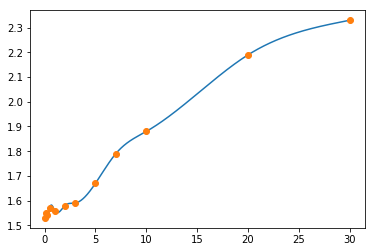

In [7]:
# The continuous yield curve on Jan 2,2020
x2 = np.linspace(1/12,30,num = 10000)
_ = plt.plot(x2,cs(x2))
_ = plt.plot(x,YieldCurve.loc['2020-01-02'],'o')
#plt.savefig('figure 2.png')

#### All

In [8]:
yield_d = {}
for i in YieldCurve.index:
    yield_d[i] = sp.interpolate.CubicSpline(x, YieldCurve.loc[i,], bc_type = 'natural')

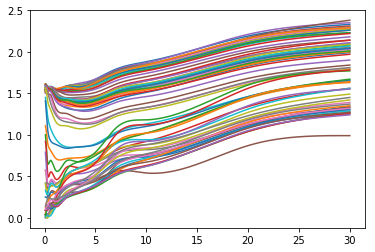

In [9]:
# The continuous yield curve everyday
for i in YieldCurve.index:
    _ = plt.plot(x2, yield_d[i](x2))

#### Month End

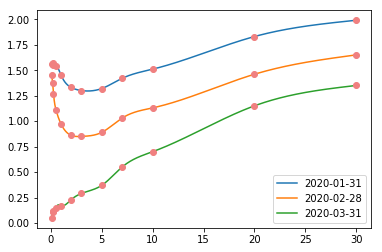

In [10]:
# the yield curves on the end of Jan, Feb, Mar 2020
_ = plt.plot(x2, yield_d[datetime(2020,1,31)](x2))
_ = plt.plot(x2, yield_d[datetime(2020,2,28)](x2))
_ = plt.plot(x2, yield_d[datetime(2020,3,31)](x2))
_ = plt.legend(['2020-01-31','2020-02-28','2020-03-31'])
_ = plt.plot(x,YieldCurve.loc['2020-01-31'],'o', color = 'lightcoral')
_ = plt.plot(x,YieldCurve.loc['2020-02-28'],'o', color = 'lightcoral')
_ = plt.plot(x,YieldCurve.loc['2020-03-31'],'o', color = 'lightcoral')
#plt.savefig('figure 4.png')

## Instantaneous Forward Rate

#### Sample

In [11]:
# Calculation function
def forwardrate(cs, x):
    return cs(x)+cs.derivative()(x)*x

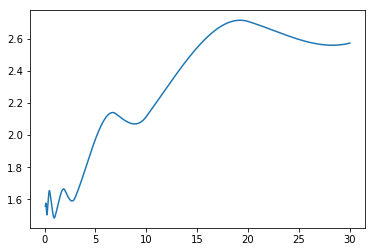

In [12]:
# The instantaneous forward rate curve in Jan 2,2020
_ = plt.plot(x2,forwardrate(cs,x2))
#plt.savefig('figure 3.png')

#### All

In [13]:
forward_d = {}
for i in YieldCurve.index:
    forward_d[i] = forwardrate(yield_d[i],x2)

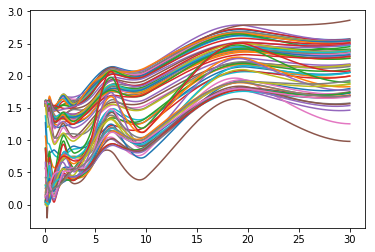

In [14]:
# The instantaneous forward rate curves everyday
for i in YieldCurve.index:
    _ = plt.plot(x2, forward_d[i])

#### End Month

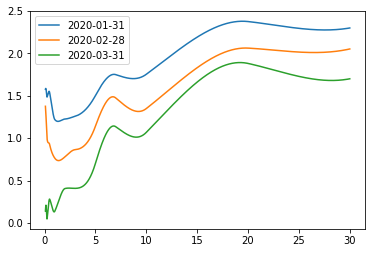

In [15]:
_ = plt.plot(x2, forward_d[datetime(2020,1,31)])
_ = plt.plot(x2, forward_d[datetime(2020,2,28)])
_ = plt.plot(x2, forward_d[datetime(2020,3,31)])
_ = plt.legend(['2020-01-31','2020-02-28','2020-03-31'])
#plt.savefig('figure 5.png')

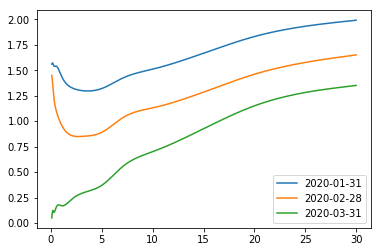

In [16]:
# The instantaneous forward rate curves on the end of Jan, Feb, Mar 2020
_ = plt.plot(x2, yield_d[datetime(2020,1,31)](x2))
_ = plt.plot(x2, yield_d[datetime(2020,2,28)](x2))
_ = plt.plot(x2, yield_d[datetime(2020,3,31)](x2))
_ = plt.legend(['2020-01-31','2020-02-28','2020-03-31'])

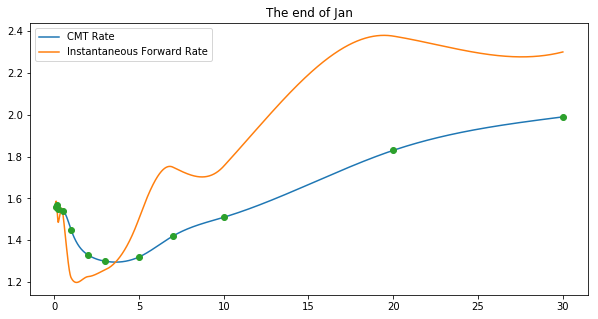

In [17]:
_ = plt.figure(figsize = (10,5))
_ = plt.plot(x2, yield_d[datetime(2020,1,31)](x2), label = 'CMT Rate')
_ = plt.plot(x2, forward_d[datetime(2020,1,31)], label = 'Instantaneous Forward Rate')
_ = plt.plot(x,YieldCurve.loc['2020-01-31'],'o', label = '')
_ = plt.legend()
_ = plt.title('The end of Jan')

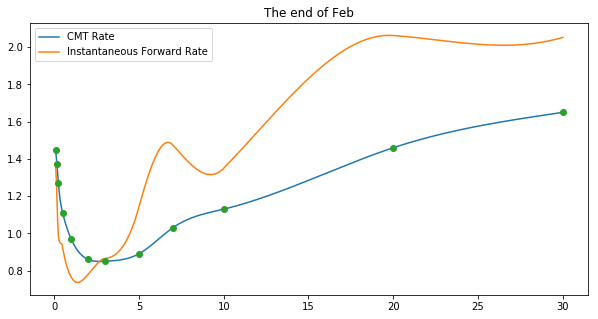

In [18]:
_ = plt.figure(figsize = (10,5))
_ = plt.plot(x2, yield_d[datetime(2020,2,28)](x2), label = 'CMT Rate')
_ = plt.plot(x2, forward_d[datetime(2020,2,28)], label = 'Instantaneous Forward Rate')
_ = plt.plot(x,YieldCurve.loc['2020-02-28'],'o', label = '')
_ = plt.legend()
_ = plt.title('The end of Feb')

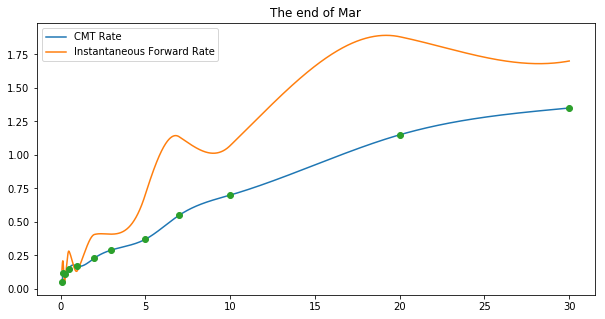

In [19]:
_ = plt.figure(figsize = (10,5))
_ = plt.plot(x2, yield_d[datetime(2020,3,31)](x2), label = 'CMT Rate')
_ = plt.plot(x2, forward_d[datetime(2020,3,31)], label = 'Instantaneous Forward Rate')
_ = plt.plot(x,YieldCurve.loc['2020-03-31'],'o', label = '')
_ = plt.legend()
_ = plt.title('The end of Mar')

## Bond Price

In [20]:
class Bond:
    def __init__(self, coupon, maturity, cf):
        self.coupon = coupon # Coupon Rate
        self.maturity = maturity # Maturity Date
        self.cf = cf # Conversion Factor
    def couponDate(self, currentDate):
        # Return the all coupon dates except maturity date of a bond on a specific date.
        from calendar import monthrange
        d = self.maturity.day
        m1 = self.maturity.month
        m2 = (m1 + 6)%12
        dates = []
        if(d == monthrange(self.maturity.year,self.maturity.month)[1]):
            if(m1>m2):
                if(currentDate < datetime(currentDate.year,m2,monthrange(currentDate.year,m2)[1])):
                    for i in range(currentDate.year,self.maturity.year):
                        dates.append(datetime(i,m2,monthrange(i,m2)[1]))
                        dates.append(datetime(i,m1,monthrange(i,m1)[1]))
                    dates.append(datetime(self.maturity.year,m2,monthrange(self.maturity.year,m2)[1]))
                elif(currentDate < datetime(currentDate.year,m1,monthrange(currentDate.year,m1)[1])):
                    dates.append(datetime(currentDate.year,m1,monthrange(currentDate.year,m1)[1]))
                    for i in range(currentDate.year+1,self.maturity.year):
                        dates.append(datetime(i,m2,monthrange(i,m2)[1]))
                        dates.append(datetime(i,m1,monthrange(i,m1)[1]))
                    dates.append(datetime(self.maturity.year,m2,monthrange(self.maturity.year,m2)[1]))
                else:
                    for i in range(currentDate.year+1,self.maturity.year):
                        dates.append(datetime(i,m2,monthrange(i,m2)[1]))
                        dates.append(datetime(i,m1,monthrange(i,m1)[1]))
                    dates.append(datetime(self.maturity.year,m2,monthrange(self.maturity.year,m2)[1]))
            else:
                if(currentDate < datetime(currentDate.year,m1,monthrange(currentDate.year,m1)[1])):
                    for i in range(currentDate.year,self.maturity.year):
                        dates.append(datetime(i,m1,monthrange(i,m1)[1]))
                        dates.append(datetime(i,m2,monthrange(i,m2)[1]))
                elif(currentDate < datetime(currentDate.year,m2,monthrange(currentDate.year,m2)[1])):
                    dates.append(datetime(currentDate.year,m2,monthrange(currentDate.year,m2)[1]))
                    for i in range(currentDate.year+1,self.maturity.year):
                        dates.append(datetime(i,m1,monthrange(i,m1)[1]))
                        dates.append(datetime(i,m2,monthrange(i,m2)[1]))
                else:
                    for i in range(currentDate.year+1,self.maturity.year):
                        dates.append(datetime(i,m1,monthrange(i,m1)[1]))
                        dates.append(datetime(i,m2,monthrange(i,m2)[1]))  
        else:
            if(m1>m2):
                if(currentDate < datetime(currentDate.year,m2,d)):
                    for i in range(currentDate.year,self.maturity.year):
                        dates.append(datetime(i,m2,d))
                        dates.append(datetime(i,m1,d))
                    dates.append(datetime(self.maturity.year,m2,d))
                elif(currentDate < datetime(currentDate.year,m1,d)):
                    dates.append(datetime(currentDate.year,m1,d))
                    for i in range(currentDate.year+1,self.maturity.year):
                        dates.append(datetime(i,m2,d))
                        dates.append(datetime(i,m1,d))
                    dates.append(datetime(self.maturity.year,m2,d))
                else:
                    for i in range(currentDate.year+1,self.maturity.year):
                        dates.append(datetime(i,m2,d))
                        dates.append(datetime(i,m1,d))
                    dates.append(datetime(self.maturity.year,m2,d))
            else:
                if(currentDate < datetime(currentDate.year,m1,d)):
                    for i in range(currentDate.year,self.maturity.year):
                        dates.append(datetime(i,m1,d))
                        dates.append(datetime(i,m2,d))
                elif(currentDate < datetime(currentDate.year,m2,d)):
                    dates.append(datetime(currentDate.year,m2,d))
                    for i in range(currentDate.year+1,self.maturity.year):
                        dates.append(datetime(i,m1,d))
                        dates.append(datetime(i,m2,d))
                else:
                    for i in range(currentDate.year+1,self.maturity.year):
                        dates.append(datetime(i,m1,d))
                        dates.append(datetime(i,m2,d))
                        
        return dates
    
    def price(self, currentDate, curve):
        # Calculate bond price on specific date.
        price = 0
        for i in self.couponDate(currentDate):
            years = (i-currentDate).days/365
            price = price + (self.coupon/2)/(1+0.01*curve(years))**(years)
        years = (self.maturity-currentDate).days/365
        price = price + (100+self.coupon/2)/(1+0.01*curve(years))**(years)    
        return price

In [21]:
# All Bonds
B1 = Bond(2.25,datetime(2027,2,15),0.8006)
B2 = Bond(1.75,datetime(2026,12,31),0.774)
B3 = Bond(1.50,datetime(2027,1,31),0.7607)
B4 = Bond(1.125,datetime(2027,2,28),0.7408)
B5 = Bond(2.375,datetime(2027,5,15),0.8012)
B6 = Bond(2.25,datetime(2027,8,15),0.7882)
B7 = Bond(0.625,datetime(2027,3,31),0.7052)
B8 = Bond(2.25,datetime(2027,11,15),0.7821)
B9 = Bond(2.75,datetime(2028,2,15),0.806)
B10 = Bond(2.875,datetime(2028,5,15),0.8085)
B11 = Bond(2.875,datetime(2028,8,15),0.8037)
B12 = Bond(3.125,datetime(2028,11,15),0.815)
B13 = Bond(2.625,datetime(2029,2,15),0.7778)
B14 = Bond(2.375,datetime(2029,5,15),0.756)
B15 = Bond(1.625,datetime(2029,8,15),0.6991)
B16 = Bond(1.75,datetime(2029,11,15),0.7016)
B17 = Bond(1.50,datetime(2030,2,15),0.6777)

In [22]:
Bond_list = [B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,B13,B14,B15,B16,B17]
cols = ['B1','B2','B3','B4','B5','B6','B7','B8','B9','B10','B11','B12','B13','B14','B15','B16','B17']

#### Bond Price Series

In [23]:
Bond_price = pd.DataFrame(index = YieldCurve.index, columns = cols)
for i in YieldCurve.index:
    row = []
    for j in Bond_list:
        row.append(j.price(i, yield_d[i]))
    Bond_price.loc[i,] = row

In [24]:
Bond_price.head(10)

,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,B13,B14,B15,B16,B17
Date,,,,,,,,,,,,,,,,,
2020-01-02,103.984,99.8379,98.7686,95.9635,104.343,104.055,92.2699,103.524,108.086,108.538,109.426,110.957,107.567,104.855,98.6072,99.247,97.2035
2020-01-03,104.52,100.36,99.2899,96.4814,104.893,104.617,92.7824,104.101,108.69,109.163,110.069,111.627,108.244,105.544,99.2929,99.9565,97.9239
2020-01-06,104.468,100.309,99.2403,96.4335,104.843,104.567,92.7365,104.051,108.638,109.108,110.012,111.565,108.181,105.477,99.2248,99.8829,97.8467
2020-01-07,104.346,100.189,99.1199,96.3124,104.716,104.436,92.6148,103.916,108.497,108.962,109.862,111.41,108.022,105.316,99.0629,99.7161,97.6769
2020-01-08,104.08,99.9321,98.8634,96.0582,104.442,104.156,92.3643,103.628,108.194,108.649,109.54,111.074,107.685,104.973,98.724,99.3652,97.3212
2020-01-09,104.156,100.005,98.9358,96.1295,104.521,104.239,92.4342,103.716,108.292,108.756,109.656,111.203,107.823,105.123,98.8819,99.5382,97.5067
2020-01-10,104.356,100.201,99.1315,96.3245,104.725,104.444,92.6275,103.923,108.502,108.967,109.866,111.414,108.028,105.322,99.0719,99.7261,97.689
2020-01-13,104.242,100.089,99.0199,96.2138,104.608,104.326,92.5181,103.802,108.376,108.835,109.73,111.271,107.882,105.172,98.9202,99.5677,97.5267
2020-01-14,104.38,100.222,99.1542,96.3483,104.754,104.479,92.6525,103.964,108.551,109.023,109.929,111.485,108.106,105.408,99.1638,99.8265,97.7971


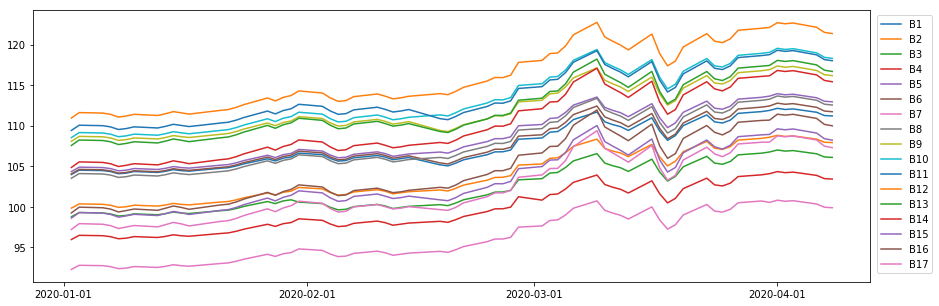

In [36]:
# Daily price series of Bond prices
_ = plt.figure(figsize = (15,5))
for i in Bond_price.columns:
    _ = plt.plot(Bond_price.index,Bond_price.loc[:,i])
    _ = plt.xticks(ticks = ['2020-01-01','2020-02-01','2020-03-01','2020-04-01'], labels = ['2020-01-01','2020-02-01','2020-03-01','2020-04-01'])
_ = plt.legend(loc = 'upper right', bbox_to_anchor = (1.08,1))
#plt.savefig('figure 6.png')

#### Bond Price Rate of Return

In [26]:
Bond_return = (Bond_price.diff()/Bond_price.shift()).iloc[1:,:] * 100

In [27]:
Bond_return.head()

,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,B13,B14,B15,B16,B17
Date,,,,,,,,,,,,,,,,,
2020-01-03,0.515518,0.522736,0.527721,0.539699,0.527607,0.539897,0.555444,0.557006,0.558783,0.575318,0.5879,0.603721,0.628837,0.657111,0.695473,0.714885,0.741068
2020-01-06,-0.0491379,-0.0510184,-0.0499515,-0.049626,-0.0482387,-0.0471615,-0.0494601,-0.0478813,-0.0480905,-0.0502796,-0.0519388,-0.0552964,-0.0585399,-0.0633246,-0.0686077,-0.0736347,-0.0788077
2020-01-07,-0.116971,-0.118853,-0.121268,-0.125595,-0.12093,-0.125315,-0.131224,-0.130082,-0.129867,-0.133599,-0.136585,-0.139482,-0.146159,-0.152864,-0.163205,-0.167007,-0.173545
2020-01-08,-0.254834,-0.256722,-0.25879,-0.263944,-0.261759,-0.267966,-0.270508,-0.276677,-0.278701,-0.287068,-0.293047,-0.301118,-0.312133,-0.325248,-0.342091,-0.351858,-0.364176
2020-01-09,0.072751,0.0730083,0.0731907,0.0742292,0.0754889,0.0790813,0.0756999,0.0849268,0.0901009,0.0980674,0.106246,0.116108,0.128317,0.142217,0.159978,0.174046,0.19065


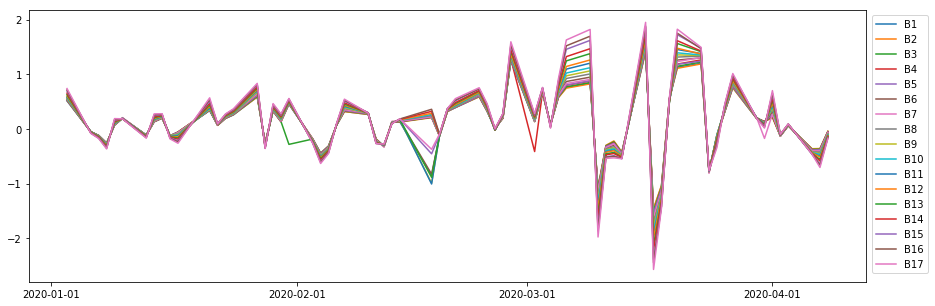

In [28]:
# Bond price rate of return
_ = plt.figure(figsize = (15,5))
for i in Bond_return.columns:
    _ = plt.plot(Bond_return.index,Bond_return.loc[:,i])
    _ = plt.xticks(ticks = ['2020-01-01','2020-02-01','2020-03-01','2020-04-01'], labels = ['2020-01-01','2020-02-01','2020-03-01','2020-04-01'])
_ = plt.legend(loc = 'upper right', bbox_to_anchor = (1.08,1))
plt.savefig('figure 7.png')

#### Check Bond conversion factor

In [29]:
Futures_maturity = datetime(2020,6,1)

In [30]:
# Calculate conversion factor of bond on specific Futures
def factor(Bond, Futures_maturity):
    if(Bond.maturity.month - Futures_maturity.month >=0):
        n = Bond.maturity.year - Futures_maturity.year
        m = Bond.maturity.month - Futures_maturity.month
    else:
        n = Bond.maturity.year - Futures_maturity.year -1
        m = 12+(Bond.maturity.month - Futures_maturity.month)
    z = (m//3)*3
    v = z if z<7 else (z-6)
    a = 1/1.03**(v/6)
    b = (Bond.coupon*0.01/2)*(6-v)/6
    c = 1/1.03**(2*n) if (z<7) else 1/1.03**(2*n+1)
    d = (Bond.coupon*0.01/0.06)*(1-c)
    factor = a * (Bond.coupon*0.01/2+c+d) -b
    return factor

In [31]:
print('%.4f' % factor(B1,Futures_maturity))
print('%.4f' % factor(B2,Futures_maturity))
print('%.4f' % factor(B3,Futures_maturity))
print('%.4f' % factor(B4,Futures_maturity))
print('%.4f' % factor(B5,Futures_maturity))
print('%.4f' % factor(B6,Futures_maturity))
print('%.4f' % factor(B7,Futures_maturity))
print('%.4f' % factor(B8,Futures_maturity))
print('%.4f' % factor(B9,Futures_maturity))
print('%.4f' % factor(B10,Futures_maturity))
print('%.4f' % factor(B11,Futures_maturity))
print('%.4f' % factor(B12,Futures_maturity))
print('%.4f' % factor(B13,Futures_maturity))
print('%.4f' % factor(B14,Futures_maturity))
print('%.4f' % factor(B15,Futures_maturity))
print('%.4f' % factor(B16,Futures_maturity))
print('%.4f' % factor(B17,Futures_maturity))

0.8006
0.7740
0.7607
0.7408
0.8012
0.7882
0.7052
0.7821
0.8060
0.8085
0.8037
0.8150
0.7778
0.7560
0.6991
0.7016
0.6777


#### Bond conversion factor adjusted return

In [32]:
Bond_adjreturn = Bond_return.copy()

In [33]:
Bond_adjreturn.B1 = Bond_return.B1 * B1.cf
Bond_adjreturn.B2 = Bond_return.B2 * B2.cf
Bond_adjreturn.B3 = Bond_return.B3 * B3.cf
Bond_adjreturn.B4 = Bond_return.B4 * B4.cf
Bond_adjreturn.B5 = Bond_return.B5 * B5.cf
Bond_adjreturn.B6 = Bond_return.B6 * B6.cf
Bond_adjreturn.B7 = Bond_return.B7 * B7.cf
Bond_adjreturn.B8 = Bond_return.B8 * B8.cf
Bond_adjreturn.B9 = Bond_return.B9 * B9.cf
Bond_adjreturn.B10 = Bond_return.B10 * B10.cf
Bond_adjreturn.B11 = Bond_return.B11 * B11.cf
Bond_adjreturn.B12 = Bond_return.B12 * B12.cf
Bond_adjreturn.B13 = Bond_return.B13 * B13.cf
Bond_adjreturn.B14 = Bond_return.B14 * B14.cf
Bond_adjreturn.B15 = Bond_return.B15 * B15.cf
Bond_adjreturn.B16 = Bond_return.B16 * B16.cf
Bond_adjreturn.B17 = Bond_return.B17 * B17.cf

In [34]:
Bond_adjreturn.head()

,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,B13,B14,B15,B16,B17
Date,,,,,,,,,,,,,,,,,
2020-01-03,0.412724,0.404598,0.401437,0.399809,0.422718,0.425546,0.391699,0.435635,0.450379,0.465145,0.472496,0.492033,0.489109,0.496776,0.486205,0.501564,0.502222
2020-01-06,-0.0393398,-0.0394882,-0.0379981,-0.0367629,-0.0386488,-0.0371727,-0.0348792,-0.037448,-0.038761,-0.0406511,-0.0417432,-0.0450666,-0.0455323,-0.0478734,-0.0479636,-0.0516621,-0.053408
2020-01-07,-0.0936467,-0.0919924,-0.0922485,-0.0930407,-0.096889,-0.098773,-0.0925389,-0.101737,-0.104672,-0.108015,-0.109774,-0.113678,-0.113683,-0.115565,-0.114097,-0.117172,-0.117611
2020-01-08,-0.20402,-0.198703,-0.196862,-0.195529,-0.209721,-0.211211,-0.190762,-0.216389,-0.224633,-0.232094,-0.235522,-0.245411,-0.242777,-0.245887,-0.239156,-0.246863,-0.246802
2020-01-09,0.0582445,0.0565084,0.0556761,0.054989,0.0604817,0.0623319,0.0533836,0.0664213,0.0726213,0.0792875,0.0853897,0.0946281,0.0998048,0.107516,0.11184,0.122111,0.129204


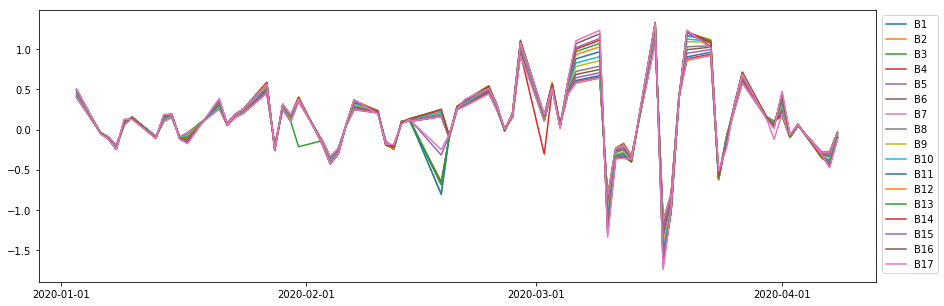

In [35]:
_ = plt.figure(figsize = (15,5))
for i in Bond_adjreturn.columns:
    _ = plt.plot(Bond_adjreturn.index,Bond_adjreturn.loc[:,i])
    _ = plt.xticks(ticks = ['2020-01-01','2020-02-01','2020-03-01','2020-04-01'], labels = ['2020-01-01','2020-02-01','2020-03-01','2020-04-01'])
_ = plt.legend(loc = 'upper right', bbox_to_anchor = (1.08,1))
plt.savefig('figure 8.png')